In [1]:
import pandas as pd
from fileio import read_df_from_file, convert_df_to_vw
from Expert import Expert
import matplotlib.pyplot as plt

In [2]:
df: pd.DataFrame; features: list[str]; training_examples: list[str]
df, features = read_df_from_file()
training_examples = convert_df_to_vw(df, features)

In [3]:
learning_rate: float = 0.5
loss: str = "hinge"
expert: Expert = Expert(features=features, learning_rate=learning_rate, loss_function=loss)

In [4]:
for ex in training_examples:
    expert.learn(ex)

In [5]:
logs: list[str]; history: pd.DataFrame
logs, history = expert.get_log()
history.head()

,average loss,sample loss,sample number,cumulative sample weight,true label,predicted label,number of features
0,1.000000,1.0,1.0,1.0,-1.0,0.0,29.0
1,0.500000,0.0,2.0,2.0,-1.0,-1.0,19.0
2,0.333333,0.0,3.0,3.0,-1.0,-1.0,5.0
3,0.250000,0.0,4.0,4.0,-1.0,-1.0,24.0
4,0.200000,0.0,5.0,5.0,-1.0,-1.0,16.0


In [6]:
weight_df: pd.DataFrame = expert.get_weight_history()
weight_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-3.448314,0.0,-1.149528,0.0,-0.104493,-1.149528,0.0,0.0,-0.149921,-3.448314,...,0.0,-0.172416,-0.271454,-0.538866,0.0,-6.896628,0.0,-0.013321,-0.000907,-0.000015
1,-3.448314,0.0,-1.149528,0.0,-0.104493,-1.149528,0.0,0.0,-0.149921,-3.448314,...,0.0,-0.172416,-0.271454,-0.538866,0.0,-6.896628,0.0,-0.013321,-0.000907,-0.000015
2,-3.448314,0.0,-1.149528,0.0,-0.104493,-1.149528,0.0,0.0,-0.149921,-3.448314,...,0.0,-0.172416,-0.271454,-0.538866,0.0,-6.896628,0.0,-0.013321,-0.000907,-0.000015
3,-3.448314,0.0,-1.149528,0.0,-0.104493,-1.149528,0.0,0.0,-0.149921,-3.448314,...,0.0,-0.172416,-0.271454,-0.538866,0.0,-6.896628,0.0,-0.013321,-0.000907,-0.000015
4,-3.448314,0.0,-1.149528,0.0,-0.104493,-1.149528,0.0,0.0,-0.149921,-3.448314,...,0.0,-0.172416,-0.271454,-0.538866,0.0,-6.896628,0.0,-0.013321,-0.000907,-0.000015


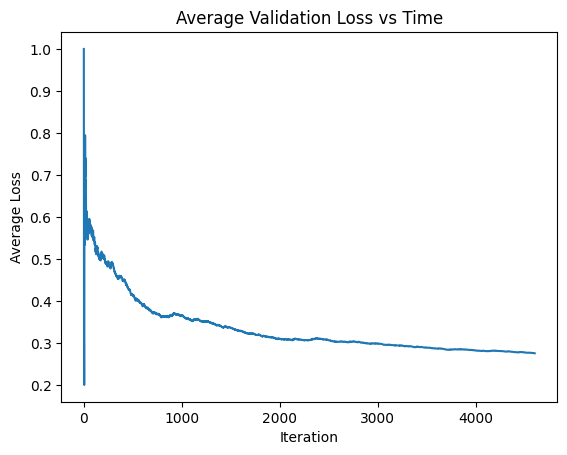

In [13]:
plt.plot(history['sample number'], history['average loss'])
plt.title("Average Validation Loss vs Time")
plt.xlabel("Iteration")
plt.ylabel("Average Loss")
plt.show()

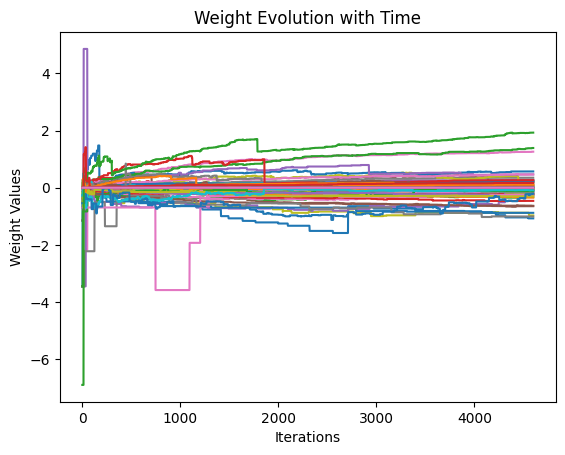

In [15]:
for col in weight_df.columns:
    plt.plot(history['sample number'], weight_df[col])
plt.title("Weight Evolution with Time")
plt.xlabel("Iterations")
plt.ylabel("Weight Values")
plt.show()